# Andrea Russo AR23110010747
## T18 Practical Task1

### Import relevant packages

In [1]:
# Data and mathematics
import pandas as pd
import numpy as np

# Data preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

# Regressor
from sklearn.linear_model import LinearRegression

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation metrics
from sklearn.metrics import r2_score

## 1) Data Collection:
 Here we import the dataset into a datafram.e

In [3]:
# Import dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2) Exploratory data analysis: Here we analyse the data and look for anomalies and outlier.

  Data analysis is key to obtain good results in any ML progr.am

In [4]:
# Data summary:
print('Shape: ', df.shape, 'Size: ', df.size, 'Dimensions: ', df.ndim)
print('Columns summary:')
df.info()

Shape:  (1338, 7) Size:  9366 Dimensions:  2
Columns summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Check for misisng values:
print('Missing Values:')
df.isna().sum() # We can see that there are no missing values

Missing Values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Quick Statistical description:
print('Dataset Statistics:')
df.describe(percentiles=[0.25,0.5,0.75,0.99]) 

Dataset Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
99%,64.000000,46.407900,5.000000,48537.480726
max,64.000000,53.130000,5.000000,63770.428010


Given that the minima/maxima are never too far below/above the mean, we can exclude outliers for the purpose of this exercise.

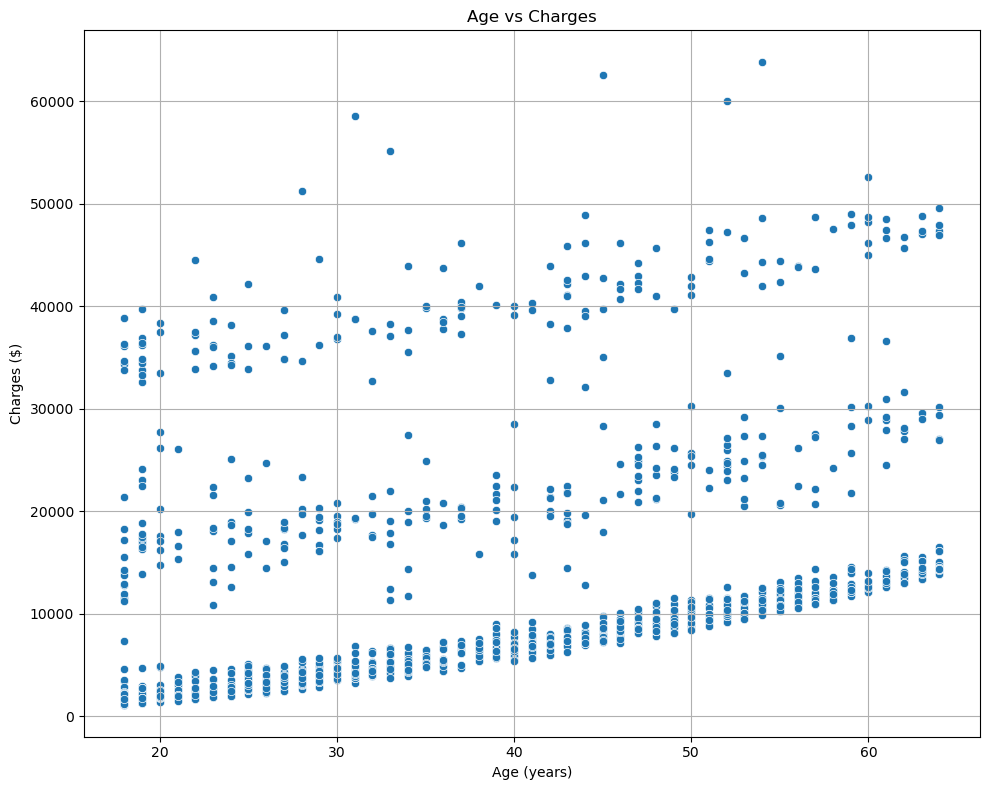

In [30]:
# Plot data scatterplot:

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs Charges')
plt.grid(True)
plt.xlabel('Age (years)')
plt.ylabel('Charges ($)')
plt.tight_layout()
plt.show()

The linear trend of data is visible

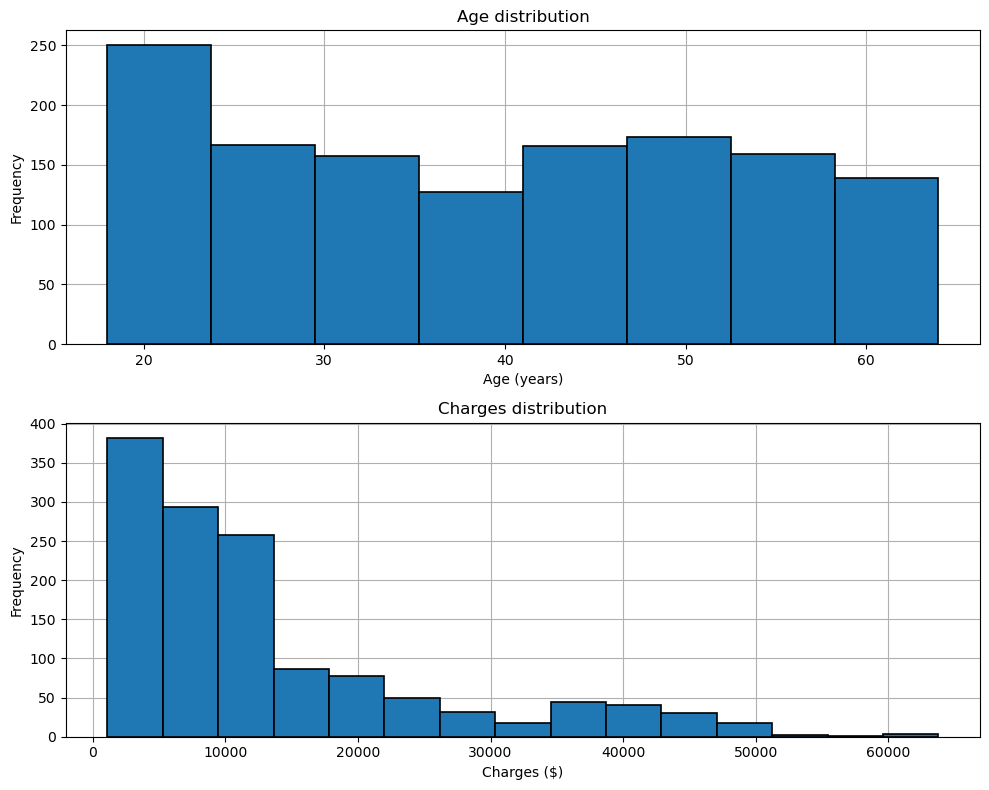

In [21]:
# By visualising the data, we see that the insurance cost has a big right skew
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))

ax1.hist(df['age'], bins=8, edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Frequency')
ax1.set_title('Age distribution')
ax1.set_axisbelow(True)
ax1.grid(True)

ax2.hist(df['charges'], bins=15, edgecolor='black', linewidth=1.2)
ax2.set_xlabel('Charges ($)')
ax2.set_ylabel('Frequency')
ax2.set_title('Charges distribution')
ax2.set_axisbelow(True)
ax2.grid(True)

plt.tight_layout()
plt.show()

## 3) Data transformation:
Here we separate the data into train-test, and prepare the features for the next steps of the algorithm.

Given that the "charges" data exhibit a clear right-skew, we will use a log-transform to rescale it appropriately and improve the ML algorithm.

In [10]:
# Split data into regressand and regressor and reshape

x = df['age'].values.reshape(-1, 1) # Regressor
y = df['charges'].values.reshape(-1, 1) # Regressand

# Divide input and output into train, and test subsets.
# No validation set will be created for this exercises.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, shuffle=False)

# Check train and test data size:
print(f"Train and Test Size: {x_train.shape}, {y_train.shape}, {x_test.shape}, {y_test.shape}")

Train and Test Size: (802, 1), (802, 1), (536, 1), (536, 1)


In [11]:
# Now we can rescale the charges variable using a log transform
scaler = FunctionTransformer(np.log1p, validate=True) # validate=True checks that the input is valid

# We fit the sclare on the train data only to avoid leaking of information
y_train_scaled = scaler.fit_transform(y_train)

# We also have to scale the test variable
y_test_scaled = scaler.transform(y_test)

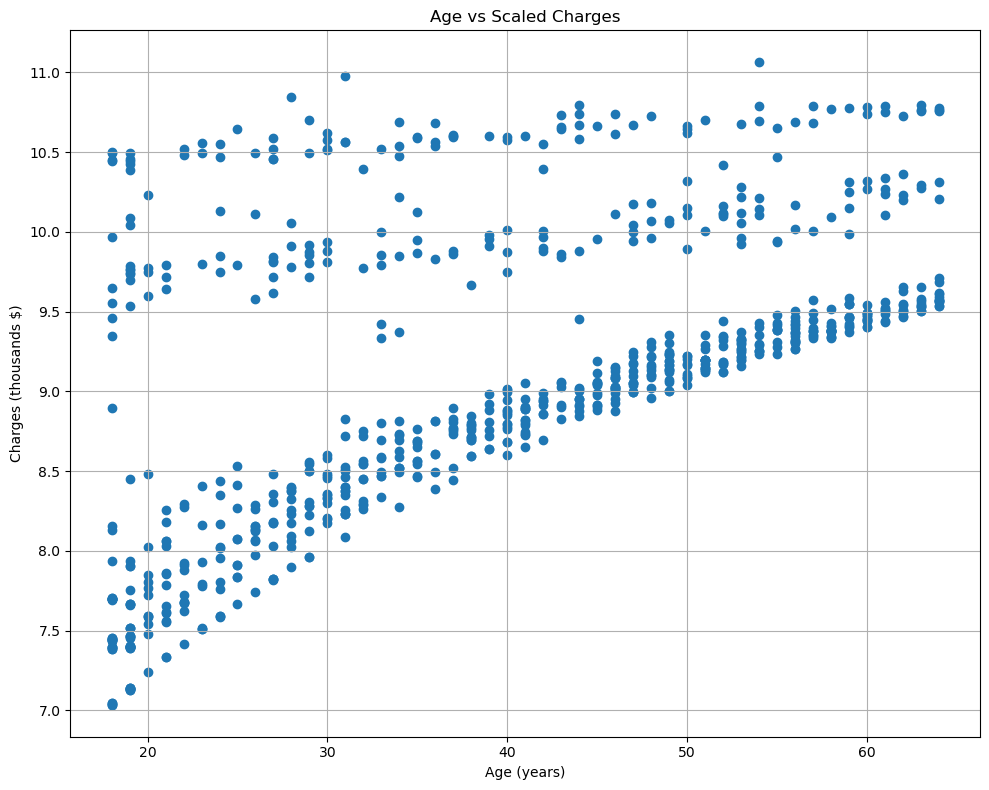

In [29]:
# The linear trend of data is much more visible now
plt.figure(figsize=(10, 8))
plt.scatter(x_train,y_train_scaled)
plt.title('Age vs Scaled Charges')
plt.grid(True)
plt.xlabel('Age (years)')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()

## 4) Modelling:
Here, we proceed to the implementation of the linear regression. Firstly, we fit the model on the training data, then we use it to make a prediction based on the test data.

In [13]:
# Fit and train the regression model
linear_model = LinearRegression()
linear_model = linear_model.fit(x_train,y_train_scaled)

# Predict the target label on x
y_pred = linear_model.predict(x_test)

## 5) Evaluation:
Here, we evaluate the performance of the regression model. We use the R2 score to examine the explained variance and a scatter plot with a best fit line to see the result clearly.

In [14]:
# The R2 score is the portion of explained variance
score = r2_score(y_test_scaled, y_pred)
print(f"The R2 score is: {score}")

The R2 score is: 0.22653450677213727


The R2 score is about 0.22. This implies that only 22% of the variqance is explained by age. This could be because the relationship between age and insurance costs is not linear, but it is much more probably to be attributed to the fact that age alone is not sufficent to predict cost insurance, and one should use the other features of the dataset to obtain better predictions.

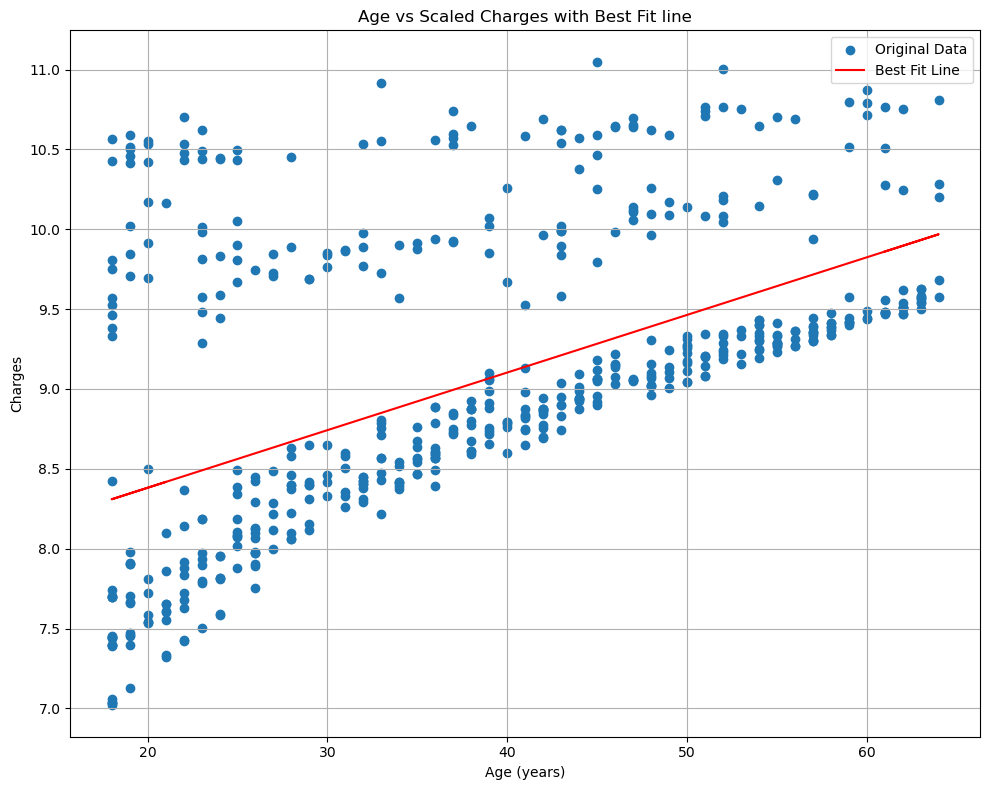

In [31]:
# Data with best fit line
plt.figure(figsize=(10, 8))
plt.scatter(x_test,y_test_scaled, label='Original Data')
plt.plot(x_test,y_pred, color='red', label='Best Fit Line')
plt.title('Age vs Scaled Charges with Best Fit line')
plt.grid(True)
plt.xlabel('Age (years)')
plt.ylabel('Charges')
plt.legend()
plt.tight_layout()
plt.show()

While the best fit line is capturing something about the dataset, age is clearly not enought to make accurate prediction about insurance costs.